<a href="https://colab.research.google.com/github/MaheshKumarMK/Restaurant-rating-prediction/blob/main/Ratings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle


In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maheshkumarvb","key":"647bab5cd8accdc60925b3743c531b47"}'}

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [8]:
 ! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                      COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           8692        258  1.0              
mattop/alcohol-consumption-per-capita-2016                     Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            797         29  1.0              
thedevastator/jobs-dataset-from-glassdoor                      Salary Prediction                                     3MB  2022-11-16 13:52:31           5589        124  1.0              
swaptr/fifa-world-cup-2022-statistics                          FI

In [9]:
 !kaggle datasets list -s "Zomato Bangalore Restaurants"

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
himanshupoddar/zomato-bangalore-restaurants                    Zomato Bangalore Restaurants                         89MB  2019-03-31 09:48:43          47865       1180  1.0              
vora1011/zomato-bangalore-restaurants-2022                     Zomato Bangalore Restaurants 2022                   702KB  2022-03-26 13:07:54            754         28  1.0              
aestheteaman01/zomato-restaurant-caf-dataset-pune-bangalore    Zomato Restaurants in Metropolitan Areas of India   791KB  2021-08-30 19:10:34            770         42  1.0              
vora1011/zomato-kolkata-restaurants-2022                       Zo

In [10]:
! kaggle datasets download -d  'himanshupoddar/zomato-bangalore-restaurants'

 90% 80.0M/89.0M [00:00<00:00, 135MB/s]
100% 89.0M/89.0M [00:00<00:00, 124MB/s]


In [11]:
!unzip zomato-bangalore-restaurants.zip

Archive:  zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [12]:

#importing required libraries

import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings


!pip install catboost
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings("ignore")
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [13]:
zomato_df = pd.read_csv("zomato.csv")

In [14]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
zomato_df.shape

(51717, 17)

In [16]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
zomato_df=zomato_df.rename(columns={"approx_cost(for two people)":"cost"})

In [18]:
zomato_df.dtypes

url                object
address            object
name               object
online_order       object
book_table         object
rate               object
votes               int64
phone              object
location           object
rest_type          object
dish_liked         object
cuisines           object
cost               object
reviews_list       object
menu_item          object
listed_in(type)    object
listed_in(city)    object
dtype: object

In [19]:
zomato_df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [20]:
zomato_df["cost"]=zomato_df["cost"].astype(str)
zomato_df["cost"]=zomato_df["cost"].apply(lambda x: x.replace(",","")).astype(float)

In [21]:
zomato_df_object=zomato_df.select_dtypes(include="object").astype(str)
col=zomato_df_object.columns.to_list()

In [22]:
zomato_df.duplicated(keep="first").sum()

0

In [23]:
zomato_df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                7775
votes                  0
phone               1208
location              21
rest_type            227
dish_liked         28078
cuisines              45
cost                 346
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

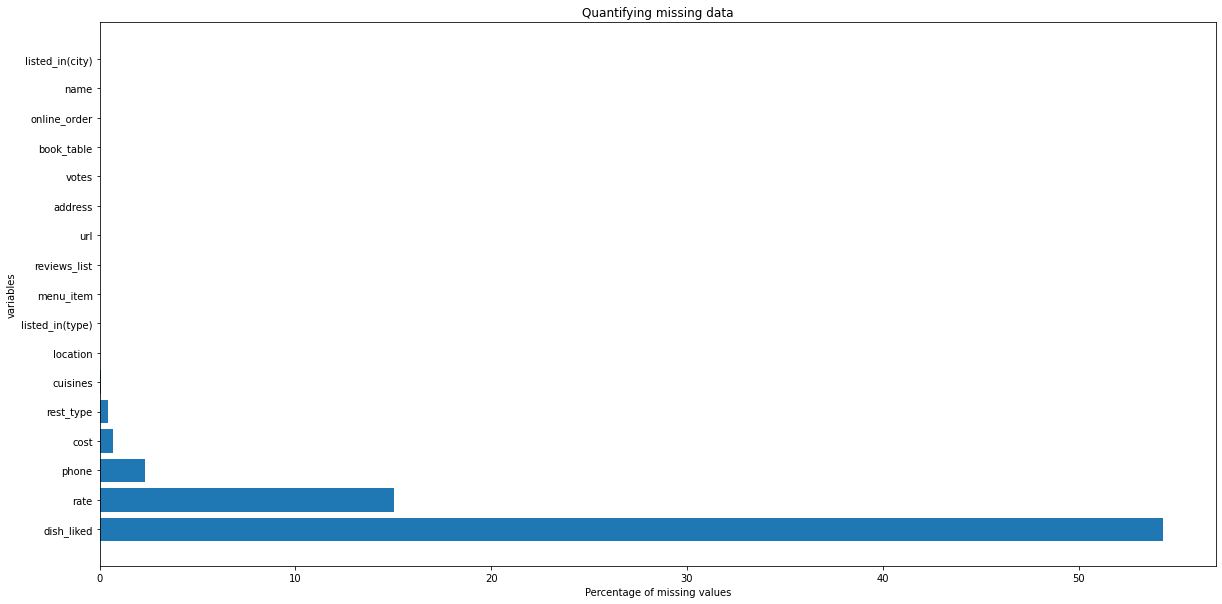

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
missing = zomato_df.isnull().sum().div(zomato_df.shape[0]).mul(100).to_frame().sort_values(by =0, ascending=False)
plt.barh(missing.index, missing.values.T[0])
plt.xlabel('Percentage of missing values')
plt.ylabel("variables")
plt.title('Quantifying missing data');

In [25]:
#Dropping col having missing values more than 50%
def drop_column_50(df):
    percentage_missing = df.isnull().sum().div(df.shape[0]).mul(100)
    col_drop=percentage_missing[percentage_missing.values>50]
    df=df.drop(col_drop.index, axis=1)
    return df.columns

In [26]:
drop_column_50(zomato_df)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [27]:
zomato_df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
# Dropping menu_item col having >70% of irrelavant datas
zomato_df.drop("menu_item", inplace=True, axis=1 )

In [29]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [30]:
## Transforming the rate column

In [31]:
zomato_df["rate"].value_counts(normalize=True)

NEW       0.050248
3.9/5     0.047745
3.8/5     0.046015
3.7/5     0.045765
3.9 /5    0.042647
            ...   
2.2 /5    0.000159
2.0 /5    0.000159
2.0/5     0.000091
1.8 /5    0.000068
1.8/5     0.000046
Name: rate, Length: 64, dtype: float64

In [32]:
zomato_df["rate"]=zomato_df["rate"].astype(str)
zomato_df["rate"]=zomato_df["rate"].apply(lambda x: x.replace("/5", "")).apply(lambda x: x.strip())
zomato_df["rate"]=zomato_df["rate"].apply(lambda x: x.replace("NEW", str(np.nan)).replace("-", str(np.nan)))
zomato_df["rate"]=zomato_df["rate"].replace("nan", 0.0).astype(float)

In [33]:
df1=zomato_df.drop(columns={'url', 'address', 'phone', 'location', 'rest_type', 'reviews_list' })

In [34]:
res=df1.groupby(by='listed_in(city)')['name'].count()
df1.loc[:,('name','listed_in(city)')].duplicated().sum()
res_=df1.loc[:,('name','listed_in(city)')].drop_duplicates(keep="first")
n_res=res_.groupby(by='listed_in(city)')['name'].count().to_frame().sort_values(by="name", ascending =False)

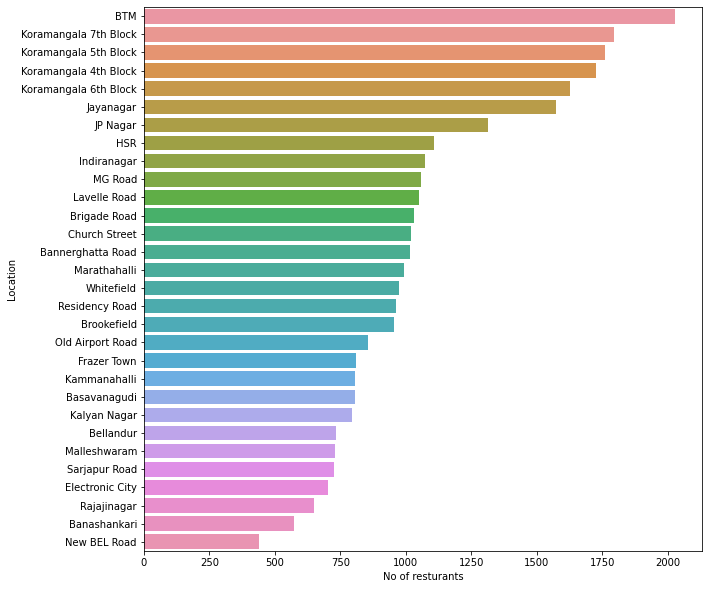

In [35]:
plt.figure(figsize=(10, 10))
sns.barplot(data=res_, y=n_res.index, x=n_res.values.T[0])
plt.ylabel('Location')
plt.xlabel('No of resturants');

In [36]:
res_branch=df1.groupby(['name','listed_in(city)']).agg({'listed_in(city)':"count"})
res_branch.columns=['city']
res_branch.sort_values(by="city", ascending =False)

city
name            listed_in(city)            
Float           Bellandur                 6
Biryani Darbar  Electronic City           6
Hammered        Frazer Town               6
Sagar Fast Food Koramangala 5th Block     6
Bun Town        BTM                       6
...                                     ...
Kamat Upahaar   New BEL Road              1
Kamat Swaad     Koramangala 7th Block     1
                Basavanagudi              1
                Bannerghatta Road         1
sCoolMeal       Koramangala 7th Block     1

[31681 rows x 1 columns]

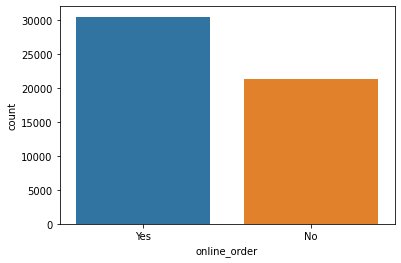

In [37]:
sns.countplot(data=df1, x="online_order")

In [38]:
online_order=df1.loc[:,('name', 'online_order' )].drop_duplicates(keep="first")

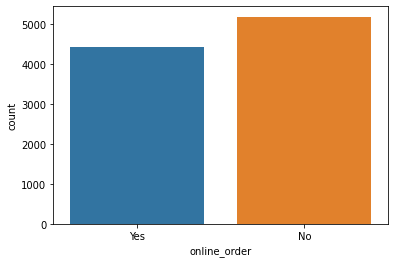

In [39]:
sns.countplot(data=online_order, x="online_order")

In [40]:
#@title Droping columns


In [41]:
cols_to_drop ={"drop_columns":["url", "address", "name", "phone", "location", "dish_liked","rest_type","menu_item"]}
cols_to_keep={"columns":["online_order", "book_table", "rate", "votes" ,"listed_in(type)", "cuisines","cost", "listed_in(city)","reviews_list"]}
numerical_cols={"numerical_cols":["votes", "cost"]}

In [42]:
#Writing columns to keep and drop to yaml file
import os
def write_yaml_file(file_path: str, content: object, replace: bool = False) -> None:
    try:
        if replace:
            if os.path.exists(file_path):
                os.remove(file_path)

        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        with open(file_path, "w") as file:
            yaml.dump(content, file)

    except Exception as e:
        raise e

In [43]:
import os
def append_yaml_file(file_path: str, content: object, replace: bool = False) -> None:
    try:
        if replace:
            if os.path.exists(file_path):
                os.remove(file_path)

        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        with open(file_path, "a") as file:
            yaml.dump(content, file)

    except Exception as e:
        raise e

In [44]:
import yaml
#write_yaml_file(file_path="schema.yaml", content=cols_to_keep)
# append_yaml_file(file_path="work/schema.yaml", content=cols_to_drop)
# append_yaml_file(file_path="work/schema.yaml", content=numerical_cols)

In [45]:
cols_to_drop=["url", "address", "name", "phone", "location","rest_type","dish_liked"]
df=zomato_df.drop(columns=cols_to_drop)
df

,online_order,book_table,rate,votes,cuisines,cost,reviews_list,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Yes,No,4.1,787,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,No,No,3.7,88,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,No,No,3.8,166,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,No,No,0.0,0,Finger Food,600.0,[],Pubs and bars,Whitefield
51714,No,No,0.0,0,Finger Food,2000.0,[],Pubs and bars,Whitefield
51715,No,Yes,4.3,236,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [46]:
import statistics as st
import numpy as np

In [47]:
numeric_col=['rate', 'votes', 'cost']
df["cost"] = df["cost"].replace(np.nan, 0)

In [48]:
# Detecting standard deviation
from pandas import DataFrame
def detect_zero_std_dev(df: DataFrame)-> bool:
  
        status = False
        report={}

        for col in numeric_col:
            if df.loc[:,[col]].values.std() != 0:
                status = True
                report.update({col:{
                    "standard_deviation":df.loc[:,[col]].values.std()
        }})

        return (report)

In [49]:

report=detect_zero_std_dev(df)
#write_yaml_file(file_path="work/stdev_report.yaml", content=report)

In [50]:
df["rate"].value_counts()
df["rate"].value_counts(normalize=True)

0.0    0.194365
3.9    0.076803
3.8    0.074888
3.7    0.073883
3.6    0.064118
4.0    0.061546
4.1    0.057003
3.5    0.053831
3.4    0.047876
3.3    0.044666
4.2    0.042230
3.2    0.036216
4.3    0.032736
3.1    0.030183
4.4    0.022178
3.0    0.019781
2.9    0.015507
4.5    0.012684
2.8    0.011602
2.7    0.005936
4.6    0.005801
2.6    0.005027
4.7    0.003229
2.5    0.001953
2.4    0.001354
4.8    0.001276
4.9    0.001063
2.3    0.000986
2.2    0.000503
2.1    0.000464
2.0    0.000213
1.8    0.000097
Name: rate, dtype: float64

In [51]:
#Extracting the datas from reviews_list col and Transforming the review_list col to ratings 
import re
df["reviews_list"]=df["reviews_list"].replace('[]',0.0)
df["str_reviews_list"]=df["reviews_list"].apply(lambda x : re.findall(r'Rated *\d+\.\d+', str(x))).apply(lambda x : re.findall(r'\d+\.\d+', str(x)))
df["str_reviews_list"]

0        [4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, ...
1        [4.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 2.0, 4.0, ...
2        [3.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 1.0, 4.0, ...
3        [4.0, 2.0, 4.0, 2.0, 4.0, 5.0, 4.0, 5.0, 3.5, ...
4                                               [4.0, 4.0]
                               ...                        
51712    [5.0, 3.5, 2.5, 3.5, 5.0, 5.0, 4.5, 5.0, 5.0, ...
51713                                                   []
51714                                                   []
51715                       [4.0, 1.0, 5.0, 5.0, 5.0, 4.0]
51716                                           [5.0, 5.0]
Name: str_reviews_list, Length: 51717, dtype: object

In [52]:
#Extracting relavat ratings and Averaging
df["mean_reviews_list"]=df["str_reviews_list"].apply(lambda x : re.findall(r'\d+\.\d+', str(x))).apply(lambda x: list(map(float,x)))
df["mean_reviews_list"]=df["mean_reviews_list"].apply(lambda x : round(np.mean(x),1))
df["mean_reviews_list"]

0        4.1
1        3.6
2        3.2
3        3.7
4        4.0
        ... 
51712    4.1
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: mean_reviews_list, Length: 51717, dtype: float64

In [53]:
df["mean_reviews_list"].value_counts(dropna=False)
df["mean_reviews_list"].replace(np.nan,0, inplace=True)

In [54]:
df["mean_reviews_list"].value_counts(dropna=False)

0.0    7595
4.0    6435
3.0    3893
5.0    3419
3.5    2629
3.8    2100
3.7    1933
4.2    1910
4.5    1749
3.9    1551
4.3    1455
4.1    1420
3.3    1350
1.0    1329
2.0    1298
3.2    1294
3.6    1230
3.4    1103
4.4     930
2.5     832
2.8     733
3.1     638
4.7     629
4.8     621
2.7     577
4.6     489
2.9     474
2.3     330
2.6     310
4.9     250
2.4     238
2.2     233
1.5     180
1.8     125
2.1     124
1.7     100
1.9      69
1.3      52
1.2      37
1.4      30
1.6      19
1.1       4
Name: mean_reviews_list, dtype: int64

In [55]:
df['rate'].value_counts(dropna=False)

0.0    10052
3.9     3972
3.8     3873
3.7     3821
3.6     3316
4.0     3183
4.1     2948
3.5     2784
3.4     2476
3.3     2310
4.2     2184
3.2     1873
4.3     1693
3.1     1561
4.4     1147
3.0     1023
2.9      802
4.5      656
2.8      600
2.7      307
4.6      300
2.6      260
4.7      167
2.5      101
2.4       70
4.8       66
4.9       55
2.3       51
2.2       26
2.1       24
2.0       11
1.8        5
Name: rate, dtype: int64

In [56]:
#Averaging the mean_review_list and rate column to get final rate column
df["rate"] =round((df["rate"] + df["mean_reviews_list"])/2,1)
df["rate"].value_counts(sort =True)

0.0    6474
4.0    5075
4.2    4694
3.8    4681
3.6    3343
3.4    3022
4.4    2334
3.2    2115
3.9    1951
4.1    1614
3.0    1490
3.7    1325
2.5    1254
2.8    1104
4.3     977
2.0     925
3.5     924
3.3     875
3.1     718
2.6     691
1.6     682
2.4     671
2.2     558
2.9     558
0.5     483
1.8     468
1.5     429
4.6     427
4.5     367
2.7     324
1.7     195
2.1     180
2.3     170
1.0     144
1.2     135
1.9     131
1.4      59
4.8      40
4.7      37
0.8      31
0.9      13
0.6      12
1.1       8
0.7       7
1.3       2
Name: rate, dtype: int64

In [57]:
#Converting ratings 
def ratings(value):
    if (value >= 0.0 and value <= 0.5): 
        return 0.0
    elif (value > 0.5 and value <= 1.4): 
        return 1.0
    elif (value > 1.4 and value <= 2.4): 
        return 2.0
    elif (value > 2.4 and value <= 3.4):
        return 3.0
    elif (value > 3.4 and value <= 4.4):
        return 4.0
    else:
        return 5.0

In [58]:
df["rate"]=df["rate"].apply(ratings)
df["rate"].value_counts()

4.0    26918
3.0    12151
0.0     6957
2.0     4409
5.0      871
1.0      411
Name: rate, dtype: int64

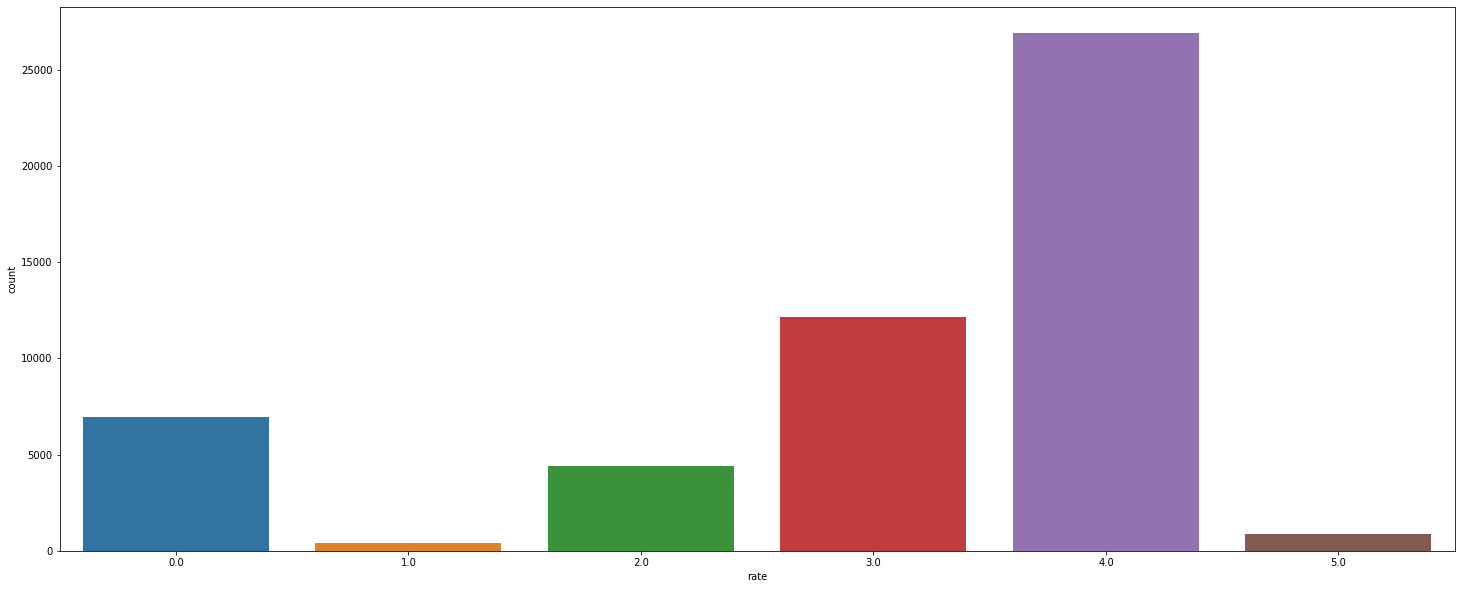

In [59]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,x=df["rate"].sort_values(ascending = True))

In [60]:
df.drop(columns={"reviews_list", "str_reviews_list","mean_reviews_list"}, inplace=True)

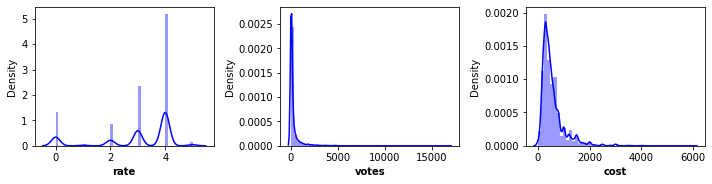

In [61]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(10, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(40, 3, i+1)
    sns.distplot(x=df[col], color='blue')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [66]:
df['cost'].replace(0,np.nan, inplace=True)
df['cost'].isnull().sum()

346

In [67]:
new_df=df[df['rate']>0].reset_index().drop(columns='index')
new_df.head(2)

,online_order,book_table,rate,votes,cuisines,cost,listed_in(type),listed_in(city)
0,Yes,Yes,4.0,775,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.0,787,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari


In [68]:
pred_data = df[df['rate']==0].reset_index().drop(columns='index')
pred_data

,online_order,book_table,rate,votes,cuisines,cost,listed_in(type),listed_in(city)
0,No,No,0.0,0,"Street Food, Fast Food",500.0,Delivery,Banashankari
1,No,No,0.0,0,"Bakery, Desserts",500.0,Delivery,Banashankari
2,No,No,0.0,0,South Indian,400.0,Delivery,Banashankari
3,No,No,0.0,0,South Indian,200.0,Delivery,Banashankari
4,No,No,0.0,0,Beverages,250.0,Delivery,Banashankari
...,...,...,...,...,...,...,...,...
6952,No,No,0.0,0,South Indian,200.0,Dine-out,Whitefield
6953,No,No,0.0,0,"Biryani, Kebab",300.0,Dine-out,Whitefield
6954,No,No,0.0,0,North Indian,400.0,Dine-out,Whitefield
6955,No,No,0.0,0,Finger Food,600.0,Pubs and bars,Whitefield


In [69]:
#Splitting the data for all experiments

In [70]:
X = new_df.drop(columns='rate')
y=new_df['rate'].astype(str)

In [71]:
X_new = X.copy()

In [72]:
num_features = X_new.select_dtypes(exclude="object").columns
catg_features = X_new.select_dtypes(include="object").columns

In [77]:
num_features.shape

(2,)

In [78]:
catg_features.shape

(5,)

In [73]:
X_new[catg_features] = X_new[catg_features].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index))

In [79]:
X_new

,online_order,book_table,votes,cuisines,cost,listed_in(type),listed_in(city)
0,1,1,775,1982.0,800.0,0,1
1,1,0,787,855.0,800.0,0,1
2,1,0,918,685.0,800.0,0,1
3,0,0,88,2339.0,300.0,0,1
4,0,0,166,2011.0,600.0,0,1
...,...,...,...,...,...,...,...
44755,0,0,0,1263.0,900.0,6,29
44756,0,0,81,105.0,800.0,6,29
44757,0,0,27,907.0,1500.0,6,29
44758,0,1,236,1263.0,2500.0,6,29


## Create functions for model training and evaluation

In [74]:
from numpy.lib.function_base import average
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted,average="micro") # Calculate F1-score
    precision = precision_score(true, predicted,average="micro") # Calculate Precision
    recall = recall_score(true, predicted,average="micro")  # Calculate Recall
    
    return acc, f1 , precision, recall

## Create a function which can evaluate models and return a report 

In [90]:
# Create a function for training data set which can evaluate models and return a report 
def evaluate_models_train(X_train, y_train, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    models_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall=evaluate_clf(y_train ,y_train_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))

        print('\n')


In [107]:
# Create a function for test dataset which can evaluate models and return a report 
def evaluate_models_test(X_test, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    models_list = []
    
    for i in range(len(list(models))):

      model = list(models.values())[i]

      y_test_pred = model.predict(X_test)
      
      # Test set performance
      model_test_accuracy,model_test_f1,model_test_precision,\
      model_test_recall=evaluate_clf(y_test, y_test_pred)

      print(list(models.keys())[i])
      models_list.append(list(models.keys())[i])

      print('Model performance for Test set')
      print('- Accuracy: {:.4f}'.format(model_test_accuracy))
      print('- F1 score: {:.4f}'.format(model_test_f1))
      print('- Precision: {:.4f}'.format(model_test_precision))
      print('- Recall: {:.4f}'.format(model_test_recall))

      print('\n')


## Experiment: 1 = KNN Imputer for Null values

Why Robust scaler and not Standard scaler?

Scaling the data using Robust scaler
Since most of the independent variables are not normally distributed we cannot use Standardscaler
Why Robust Scaler and not Minmax?

because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

## Finding the optimal n_neighbour value for KNN imputer

# Why KNN Imputer?¶
# KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
# KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
# Here we Iterates through different K values and get accuracy and choose best K values.

In [81]:
X1=X_new.copy()
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.5827)
n_neighbors= 3 || accuracy (0.5921)
n_neighbors= 5 || accuracy (0.5914)
n_neighbors= 7 || accuracy (0.5733)
n_neighbors= 9 || accuracy (0.5813)


## We can observe n_neighbors=3 able to produce highest accuracy

## Pipeline for KNN imputer

In [82]:
# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

In [109]:
X_knn_train =knn_pipeline.fit_transform(X_train)

X_knn_test =knn_pipeline.transform(X_test)


## Initialize Default Models in a dictionary

In [110]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

## Fit KNN imputed data for models in dictionary

In [111]:
report_knn_train = evaluate_models_train(X_knn_train, y_train, models)


Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6654
- F1 score: 0.6654
- Precision: 0.6654
- Recall: 0.6654


Logistic Regression
Model performance for Training set
- Accuracy: 0.6017
- F1 score: 0.6017
- Precision: 0.6017
- Recall: 0.6017


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.7519
- F1 score: 0.7519
- Precision: 0.7519
- Recall: 0.7519


XGBClassifier
Model performance for Training set
- Accuracy: 0.6503
- F1 score: 0.6503
- Precision: 0.6503
- Recall: 0.6503


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.7819
- F1 score: 0.7819
- Precision: 0.7819
- Recall: 0.7819


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6296
- F1 score: 0.62

In [113]:

report_knn_test = evaluate_models_test( X_knn_test, y_test, models)

Random Forest
Model performance for Test set
- Accuracy: 0.8216
- F1 score: 0.8216
- Precision: 0.8216
- Recall: 0.8216


Decision Tree
Model performance for Test set
- Accuracy: 0.8710
- F1 score: 0.8710
- Precision: 0.8710
- Recall: 0.8710


Gradient Boosting
Model performance for Test set
- Accuracy: 0.6556
- F1 score: 0.6556
- Precision: 0.6556
- Recall: 0.6556


Logistic Regression
Model performance for Test set
- Accuracy: 0.6029
- F1 score: 0.6029
- Precision: 0.6029
- Recall: 0.6029


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.6078
- F1 score: 0.6078
- Precision: 0.6078
- Recall: 0.6078


XGBClassifier
Model performance for Test set
- Accuracy: 0.6471
- F1 score: 0.6471
- Precision: 0.6471
- Recall: 0.6471


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.7349
- F1 score: 0.7349
- Precision: 0.7349
- Recall: 0.7349


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.6266
- F1 score: 0.6266
- Precision: 0.6266
- Recall:

## Experiment: 2 = Iterative Imputer with Strategy Median for numerical features and most frequent for categorical feature

In [114]:
# Fit the iterative imputer 

num_iterative_pipeline = Pipeline(steps=[('imp_num', IterativeImputer(initial_strategy='median')),('RobustScaler', RobustScaler())])

catg_iterative_pipeline = Pipeline(steps=[('imp_cat', IterativeImputer(initial_strategy='most_frequent')),('RobustScaler', RobustScaler())])

In [117]:
X_train[num_features] = num_iterative_pipeline.fit_transform(X_train[num_features])
X_train[catg_features] = catg_iterative_pipeline.transform(X_train[catg_features])

X_test[num_features] = num_iterative_pipeline.fit_transform(X_test[num_features])
X_test[catg_features] = catg_iterative_pipeline.transform(X_test[catg_features])

In [118]:
report_iter_train = evaluate_models_train(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6673
- F1 score: 0.6673
- Precision: 0.6673
- Recall: 0.6673


Logistic Regression
Model performance for Training set
- Accuracy: 0.6017
- F1 score: 0.6017
- Precision: 0.6017
- Recall: 0.6017


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.7604
- F1 score: 0.7604
- Precision: 0.7604
- Recall: 0.7604


XGBClassifier
Model performance for Training set
- Accuracy: 0.6495
- F1 score: 0.6495
- Precision: 0.6495
- Recall: 0.6495


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.7807
- F1 score: 0.7807
- Precision: 0.7807
- Recall: 0.7807


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6296
- F1 score: 0.62

In [119]:
report_iter_test = evaluate_models_test(X_test, y_test, models)

Random Forest
Model performance for Test set
- Accuracy: 0.7221
- F1 score: 0.7221
- Precision: 0.7221
- Recall: 0.7221


Decision Tree
Model performance for Test set
- Accuracy: 0.6519
- F1 score: 0.6519
- Precision: 0.6519
- Recall: 0.6519


Gradient Boosting
Model performance for Test set
- Accuracy: 0.6445
- F1 score: 0.6445
- Precision: 0.6445
- Recall: 0.6445


Logistic Regression
Model performance for Test set
- Accuracy: 0.6029
- F1 score: 0.6029
- Precision: 0.6029
- Recall: 0.6029


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.6324
- F1 score: 0.6324
- Precision: 0.6324
- Recall: 0.6324


XGBClassifier
Model performance for Test set
- Accuracy: 0.6424
- F1 score: 0.6424
- Precision: 0.6424
- Recall: 0.6424


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.6640
- F1 score: 0.6640
- Precision: 0.6640
- Recall: 0.6640


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.6344
- F1 score: 0.6344
- Precision: 0.6344
- Recall:

## Experiment: 3 = Simple Imputer with Strategy Median

### SimpleImputer is a class in the sklearn.impute module that can be used to replace missing values in a dataset, using a variety of input strategies.

### Here we use SimpleImputer can also be used to impute multiple columns at once by passing in a list of column names. SimpleImputer will then replace missing values in all of the specified columns.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

In [123]:

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])



In [124]:
# Fit X with median_pipeline
X_median_train = median_pipeline.fit_transform(X_train)

X_median_test = median_pipeline.transform(X_test)

In [125]:
# Training the models
report_median = evaluate_models_train(X_median_train, y_train, models)

report_median = evaluate_models_test(X_median_test, y_test, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6666
- F1 score: 0.6666
- Precision: 0.6666
- Recall: 0.6666


Logistic Regression
Model performance for Training set
- Accuracy: 0.6017
- F1 score: 0.6017
- Precision: 0.6017
- Recall: 0.6017


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.7516
- F1 score: 0.7516
- Precision: 0.7516
- Recall: 0.7516


XGBClassifier
Model performance for Training set
- Accuracy: 0.6490
- F1 score: 0.6490
- Precision: 0.6490
- Recall: 0.6490


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.7822
- F1 score: 0.7822
- Precision: 0.7822
- Recall: 0.7822


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6296
- F1 score: 0.62

## Experiment: 4 = MICE for Imputing Null values
### MICE stands for Multivariate Imputation By Chained Equations algorithm
### This technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.
### ImputationKernel Creates a kernel dataset. This dataset can perform MICE on itself, and impute new data from models obtained during MICE.

In [126]:
!pip install miceforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 2.5 MB 38.2 MB/s 
     |████████████████████████████████| 2.0 MB 49.6 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

In [173]:
import miceforest as mf

X_mice_train = X_train.copy()
kernel = mf.ImputationKernel(
  X_mice_train,
  save_all_iterations=True,
  random_state=1989)

In [174]:
X_mice_train = kernel.complete_data()

# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

# Fit X with Mice imputer 
X_mice_train= mice_pipeline.fit_transform(X_mice_train)

In [175]:
X_mice_train.shape

(35808, 7)

In [176]:

X_mice_test = X_test.copy()
kernel = mf.ImputationKernel(
  X_mice_test,
  save_all_iterations=True,
  random_state=1989)

In [177]:
X_mice_test = kernel.complete_data()
# Fit X with Mice imputer 
X_mice_test= mice_pipeline.transform(X_mice_test)

In [179]:
X_mice_test.shape

(8952, 7)

In [170]:
report_mice_train = evaluate_models_train(X_mice_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6659
- F1 score: 0.6659
- Precision: 0.6659
- Recall: 0.6659


Logistic Regression
Model performance for Training set
- Accuracy: 0.6017
- F1 score: 0.6017
- Precision: 0.6017
- Recall: 0.6017


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.7515
- F1 score: 0.7515
- Precision: 0.7515
- Recall: 0.7515


XGBClassifier
Model performance for Training set
- Accuracy: 0.6501
- F1 score: 0.6501
- Precision: 0.6501
- Recall: 0.6501


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.7815
- F1 score: 0.7815
- Precision: 0.7815
- Recall: 0.7815


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6297
- F1 score: 0.62

In [180]:
# Training the models
report_mice_test = evaluate_models_test(X_mice_test, y_test, models)

Random Forest
Model performance for Test set
- Accuracy: 0.8197
- F1 score: 0.8197
- Precision: 0.8197
- Recall: 0.8197


Decision Tree
Model performance for Test set
- Accuracy: 0.8671
- F1 score: 0.8671
- Precision: 0.8671
- Recall: 0.8671


Gradient Boosting
Model performance for Test set
- Accuracy: 0.6547
- F1 score: 0.6547
- Precision: 0.6547
- Recall: 0.6547


Logistic Regression
Model performance for Test set
- Accuracy: 0.6029
- F1 score: 0.6029
- Precision: 0.6029
- Recall: 0.6029


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.6080
- F1 score: 0.6080
- Precision: 0.6080
- Recall: 0.6080


XGBClassifier
Model performance for Test set
- Accuracy: 0.6464
- F1 score: 0.6464
- Precision: 0.6464
- Recall: 0.6464


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.7365
- F1 score: 0.7365
- Precision: 0.7365
- Recall: 0.7365


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.6265
- F1 score: 0.6265
- Precision: 0.6265
- Recall:

## Experiment: 5 = Simple Imputer with Strategy Mean

### Another strategy which can be used is replacing missing values with mean

### Here we replace the missing values with the mean of the column

In [184]:

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

# Fit X with median_pipeline
X_mean_train = median_pipeline.fit_transform(X_train)

# Training the models
report_mean = evaluate_models_train(X_mean_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9977
- Recall: 0.9977


Gradient Boosting
Model performance for Training set
- Accuracy: 0.6668
- F1 score: 0.6668
- Precision: 0.6668
- Recall: 0.6668


Logistic Regression
Model performance for Training set
- Accuracy: 0.6017
- F1 score: 0.6017
- Precision: 0.6017
- Recall: 0.6017


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.7516
- F1 score: 0.7516
- Precision: 0.7516
- Recall: 0.7516


XGBClassifier
Model performance for Training set
- Accuracy: 0.6497
- F1 score: 0.6497
- Precision: 0.6497
- Recall: 0.6497


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.7831
- F1 score: 0.7831
- Precision: 0.7831
- Recall: 0.7831


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6296
- F1 score: 0.62

In [185]:
# Fit the Simple imputer with strategy median

# Fit X with median_pipeline
X_mean_test = median_pipeline.transform(X_test)

# Training the models
report_mean = evaluate_models_test(X_mean_test, y_test, models)

Random Forest
Model performance for Test set
- Accuracy: 0.8198
- F1 score: 0.8198
- Precision: 0.8198
- Recall: 0.8198


Decision Tree
Model performance for Test set
- Accuracy: 0.8703
- F1 score: 0.8703
- Precision: 0.8703
- Recall: 0.8703


Gradient Boosting
Model performance for Test set
- Accuracy: 0.6569
- F1 score: 0.6569
- Precision: 0.6569
- Recall: 0.6569


Logistic Regression
Model performance for Test set
- Accuracy: 0.6029
- F1 score: 0.6029
- Precision: 0.6029
- Recall: 0.6029


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.6084
- F1 score: 0.6084
- Precision: 0.6084
- Recall: 0.6084


XGBClassifier
Model performance for Test set
- Accuracy: 0.6461
- F1 score: 0.6461
- Precision: 0.6461
- Recall: 0.6461


CatBoosting Classifier
Model performance for Test set
- Accuracy: 0.7363
- F1 score: 0.7363
- Precision: 0.7363
- Recall: 0.7363


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.6266
- F1 score: 0.6266
- Precision: 0.6266
- Recall: